# CGAP and Manobi Data: Commerce, Finance, Demographics #

Paul Cohen, May 21, 2021

One purpose of this notebook is to communicate what's available to modelers who are interested in the financial and demographic aaspects of CGAP and Manobi households.  A secondary purpose it to illustrate how to access the data.  Manobi data is stored in flat files, CGAP data in Data Objects and flat files.

All the following file paths are for my machine, but I've added the hyperlinks to the same data on the Pitt Habitus Box folder. 

In [1]:
import sys
import numpy as np
import pandas as pd
import copy

sys.path.append('/Users/prcohen/anaconda2/envs/aPRAM/Habitus/Data/CGAP/Data/Data Objects/Code and Notebooks')

from CGAP_JSON_Encoders_Decoders import Question_Decoder, CGAP_Encoded, CGAP_Decoded, Country_Decoded
Data = CGAP_Decoded()
Data.read_and_decode('/Users/prcohen/anaconda2/envs/aPRAM/Habitus/Data/CGAP/Data/Data Objects/CGAP_JSON.txt')

You can find `CGAP_JSON_Encoders_Decoders` and `CGAP_JSON.txt` [here](https://pitt.app.box.com/folder/136678084196) on the Pitt Habitus Box folder.

The preceding code block creates data objects for 125 CGAP questions.  You might want to read or review this [Introduction to Data Objects](https://pitt.app.box.com/folder/136678084196). 

The smallest unit of CGAP data for most purposes is the *household*.  There are 17636 households in six countries.  However, it is possible to extract data about 87000 *individuals* in these households. A notebook called [CGAP 1: Building the individual attributes dataset](https://pitt.app.box.com/folder/134211247531) shows how this is done.  The dataset itself is [here](https://pitt.app.box.com/folder/134211850283).  This folder also includes a flat file of household attributes. However, all the household data therein is encoded in the data objects that we just loaded.

In [2]:
filepath = '/Users/prcohen/anaconda2/envs/aPRAM/Habitus/Data/CGAP/Data/Derived Datasets/'
# load the individual attributes data
C_IA = pd.read_csv(filepath+'individual_attributes.csv') 
countries = ['bgd','cdi','moz','nga','tan','uga']

If you ever need to go back to the cleaned CGAP survey data, you can find the household survey data [here](https://pitt.app.box.com/folder/134211503188) and the single- and multi-respondent data, as well as the "reduced" multi-respondent data [here](https://pitt.app.box.com/folder/136316702885). 

From Manobi, I'll load two datasets from the Senegal River Valley.  These represent the 2016 growing seasons for roughly 3000 farms. These datasets are [here](https://pitt.app.box.com/folder/131436606139).

In [4]:
filepath = '/Users/prcohen/anaconda2/envs/aPRAM/Habitus/Data/Manobi Data/SRV/processed/'
farm = pd.read_csv(filepath+'demographicfarmer_StLouis_2016_cleaned.csv')
season = pd.read_csv(filepath+'plot_and_season_StLouis_2016_english.csv')

## Keys ##

A key to the Manobi plot and season data is [here](https://pitt.app.box.com/folder/131436606139).  As far as I know there is no key for the Manobi demographic data, yet.

The key for CGAP data is generated automatically from the data objects:

In [8]:
# It suffices to look at Bangladesh only
bgd_questions = [q[4:] for q in Data.__dict__.keys() if 'bgd' in q]

# Describe is a method of CGAP_Decoded objects
# You can look at individual data objects:

print(Data.describe(bgd_questions[0]) )

label : A1
 text : What is the form of ownership of your land?
 qtype : single
 survey : rr
 answers : {'lease_certificate': 1, 'customary_law': 2, 'communal': 3, 'state_ownership': 4, 'Kott': 5, 'other': 6}

None


In [9]:
# Or you can look at all of them.
# Display = False returns an f-string
descriptions = [Data.describe(q,display=False) for q in bgd_questions]

print("".join(descriptions))



label : A1
text : What is the form of ownership of your land?
qtype : single
survey : rr
answers : {'lease_certificate': 1, 'customary_law': 2, 'communal': 3, 'state_ownership': 4, 'Kott': 5, 'other': 6}


label : A2
text : How many hectares of agricultural land do you own?
qtype : single
survey : rr
answers : None


label : A3
text : How many hectares of agricultural land do rent, borrow or have the right to use?
qtype : single
survey : rr
answers : None


label : A4
text : Do you consider your farm to be a business?
qtype : single
survey : rr
answers : {'yes': 1, 'no': 2}


label : A5
text : Which of the following crops do you grow?
qtype : multi
survey : rr
answers : {'1': 'yes', '2': 'no'}
column names : ['Rice', 'Wheat', 'Mango', 'Jute', 'Maize', 'Tea', 'Pulses', 'Sugarcane', 'Tobacco', 'Chilies', 'Onions', 'Garlic', 'Potato', 'Rapeseed', 'Mustard_seed', 'Coconut', 'Eggplant', 'Radish', 'Tomatoes', 'Cauliflower', 'Cabbage', 'Pumpkin', 'Banana', 'Jackfruit', 'Pineapple', 'Guava',

## Demographic Questions ##

By demographic I mean attributes of households and individuals. 

### Various IDs ###

Manobi data has IDs for villages, cooperatives, farms, plots and seasons.  CGAP data has IDs for households and individuals.  

In [15]:
farm[['id','village_id','coop_name']]

,id,village_id,coop_name
0,3832,457,it1
1,3833,457,it1
2,3846,457,it1
3,3847,457,it1
4,3848,457,it1
...,...,...,...
3857,9421,755,NaN
3858,9364,750,NaN
3859,9383,750,NaN
3860,9387,750,NaN


In [19]:
# The two plot IDs should agree, though they are derived from plot and season data, respectively
season[['plot_ID_from_plot','plot_ID_from_season','season_ID']]


,plot_ID_from_plot,plot_ID_from_season,season_ID
0,3568,3568.0,3469.0
1,3723,3723.0,3627.0
2,3725,3725.0,7791.0
3,3726,3726.0,7792.0
4,3727,3727.0,7793.0
...,...,...,...
3102,9819,9819.0,9255.0
3103,9820,9820.0,9256.0
3104,9822,9822.0,9257.0
3105,9877,9877.0,9263.0


In [27]:
# CGAP has unique household IDs which also serve as the index of dataframe
# associated with data objects; here's the data for question 'A1' in Cote d'Ivoire,
# showing the household IDs

In [32]:
Data.col('cdi','A1')

31416320    2.0
31416321    1.0
31416322    6.0
31416323    6.0
31416324    6.0
           ... 
31186932    2.0
31186933    2.0
31186934    2.0
31285239    2.0
31416319    2.0
Name: A1, Length: 3002, dtype: float64

In [33]:
# Individuals in the individual attributes (C_IA) data can be identified
# by the index i. For example, household HHID=1 has four members. 


C_IA[['HHID','i']]

,HHID,i
0,1,1
1,1,2
2,1,3
3,1,4
4,2,1
...,...,...
87016,23620722,2
87017,23620722,3
87018,23620722,4
87019,23620722,5


### Locations ###

CGAP and Manobi code locations differently.  CGAP has four levels of location, Manobi has latitude and longitude for plots and also for villages.  Speak with Tomek about locations for Manobi data, as he's laid them out on a map.

CGAP uses many different terms for locations, but we've figured them all out and boiled them down to four levels of location called `COUNTRY, HH6, HH7, HH1` from largest to smallest area.  Here's the original information:

`cdi Zone     num unique locs: 3    mean/median num households 1006.3 / 932.0
nga Zone     num unique locs: 6    mean/median num households 504.3 / 481.5
tan Zone     num unique locs: 5    mean/median num households 598.6 / 676.0`

`bgd STRATUM  num unique locs: 14   mean/median num households 225.3 / 159.0
cdi STRATUM  num unique locs: 6    mean/median num households 503.2 / 483.0
moz STRATUM  num unique locs: 6    mean/median num households 429.0 / 333.5
tan STRATUM  num unique locs: 10   mean/median num households 299.3 / 262.0
uga STRATUM  num unique locs: 8    mean/median num households 358.8 / 357.0`

`bgd HH6      num unique locs: 7    mean/median num households 450.6 / 461.0
cdi HH6      num unique locs: 32   mean/median num households 94.3 / 82.0
moz HH6      num unique locs: 3    mean/median num households 858.0 / 884.0
nga HH6      num unique locs: 37   mean/median num households 81.8 / 80.0
tan HH6      num unique locs: 28   mean/median num households 106.9 / 95.0
uga HH6      num unique locs: 4    mean/median num households 717.5 / 729.0`

`bgd HH7      num unique locs: 61   mean/median num households 51.7 / 49.0
cdi HH7      num unique locs: 82   mean/median num households 36.8 / 28.0
moz HH7      num unique locs: 11   mean/median num households 234.0 / 165.0
nga HH7      num unique locs: 199  mean/median num households 15.2 / 16.0
tan HH7      num unique locs: 135  mean/median num households 22.2 / 16.0
uga HH7      num unique locs: 104  mean/median num households 27.6 / 23.5`

`bgd HH1      num unique locs: 203  mean/median num households 15.5 / 16.0
cdi HH1      num unique locs: 210  mean/median num households 14.4 / 15.0
moz HH1      num unique locs: 206  mean/median num households 12.5 / 13.0
nga HH1      num unique locs: 214  mean/median num households 14.1 / 15.0
tan HH1      num unique locs: 209  mean/median num households 14.3 / 15.0
uga HH1      num unique locs: 215  mean/median num households 13.3 / 14.0
tan Ward     num unique locs: 204  mean/median num households 14.7 / 15.0
nga Town     num unique locs: 214  mean/median num households 14.1 / 15.0`


HH1 codes for a small area, typically covered by one surveying team, comprising roughly 15 households.  HH1 cvodes are numeric, whereas country, HH6 and HH7 codes have recognizeable names.

Two other location-related variables are `UR`, which codes for urban (1) or rural (2); and `D14`, which asks which language is spoken at home. 

In [67]:
Data.cols_from_countries('COUNTRY','HH6','HH7','HH1','UR','D14',countries=['moz'])

,COUNTRY,HH6,HH7,HH1,UR,D14
22251317,moz,Centre,Zambezia,94,2,Chichewa
23135007,moz,North,Nampula,48,2,Emakhuwa
22289638,moz,Centre,Tete,120,2,Nhungue
22103383,moz,North,Niassa,10,2,Yao
22208086,moz,Centre,Tete,121,2,Nhungue
...,...,...,...,...,...,...
22227757,moz,South,Maputo Prov,204,2,Portugese
22551138,moz,South,Inhambane,171,2,Xitswa
23158719,moz,South,Gaza,183,2,Xichangana
22007852,moz,South,Maputo Cid,209,1,Portugese


### Demographic Attributes of Individuals ###

One big difference between CGAP and Manobi data is that in CGAP, each response can be attributed to an individual whose attributes are known, whereas in Manobi data, we don't really know who's speaking. We can assume it is the head of household, but until Manobi tells us its survey methodology, we don't know for sure. 

That said, this section deals with attributes of individuals, including age, gender, marital status, years farming, education level and so on.

#### Manobi gender, age, years in farming, and attained education level ####

,gender,age,years_farming,education_level,education_level_binned
0,0.0,44.0,15.0,AlphabEtisE,0.0
1,0.0,66.0,15.0,AlphabEtisE,0.0
2,0.0,47.0,35.0,AlphabEtisE,0.0
3,0.0,82.0,37.0,AlphabEtisE,0.0
4,0.0,65.0,35.0,AlphabEtisE,0.0
...,...,...,...,...,...
3857,0.0,43.0,10.0,Non AlphabEtisE,0.0
3858,0.0,38.0,21.0,Non AlphabEtisE,0.0
3859,0.0,30.0,10.0,Non AlphabEtisE,0.0
3860,0.0,59.0,25.0,Non AlphabEtisE,0.0


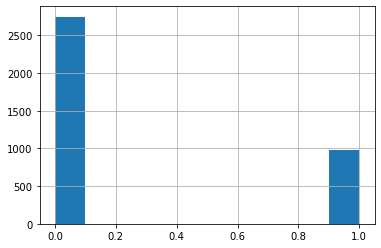

In [45]:
farm.education_level_binned.hist()
farm[['gender','age','years_farming','education_level','education_level_binned']]

Manobi codes five levels of education (though `education_level_binned` codes for just two, corresponding to no education beyond elementary school and everything else).  The six CGAP countries code from 5 to 13 levels, depending on the country. 

The CGAP countries' levels of education have been recoded onto on a single scale (described in [CGAP 1: Building the individual attributes dataset](https://pitt.app.box.com/folder/134211247531))  Manobi education levels haven't been recoded onto this scale, yet.

#### Manobi Marital Status ####

Manobi does not directly ask about marital status.  It asks how many wives a respondent has.  However, marital status means more than just married/unmarried.  CGAP data asks about cohabitation, divorce and separation, and being a widow/widower. Manobi data doesn't:

In [59]:
farm.num_wives.value_counts()

1     1938
0     1205
2      595
3      101
4       20
6        1
11       1
13       1
Name: num_wives, dtype: int64

#### CGAP Individual Attributes ####


The individual attributes dataset for CGAP reports ten attributes for each of ~87000 individuals.  These are:

- D2 : relation to the head of household, hh.  The numbers denote:
    - 1 : is head of household (hh)
    - 2 : is spouse of hh ; there may be several spouses
    - 3 : is son or daughter of hh
    - 4 : is stepson or stepdaughter of hh
    - 5 : is grandchild of hh
    - 6 : is father or mother of hh
    - 7 : is parent-in-law of hh
    - 8 : is brother or sister of hh
    - 9 : is other relative of hh
    - 10 : is not related
- D3 : gender (1 = male, 2 = female)
- D4 : marital status:
    - 1 : Single/Never married
    - 2 : Married
    - 3 : Divorced/separated
    - 4 : Widowed
    - 5 : Living together/cohabiting
- D5 : age
- D6 : Whether the household member has ever attended school (1 = yes, 2 = no)
- D7 : Whether the household member is currently in school (1 = full time, 2 = part time, 3 = not in school)
- D8 : highest grade level attended, coded using the scheme mentioned above, which maps all countries to one scale
- Orig_D8 : Original, country-specific values of D8, before recoding
- D9 : whether highest grade level was completed (yes = 1, 2 = no)
- D10 : whether the household member contributes to household income (yes = 1, 2 = no)
- D11 : whether the household member participates in household agricultural activities (yes = 1, 2 = no)

To illustrate, let's crosstabulate gender and education level.  I think it's rather surprising that there are really no big differences to be seen:  41% of females have education level = 2 compared with 42% of males; 28% of females have education level = 3, compared with 25% of males.   

In [61]:
pd.crosstab(C_IA.D3, C_IA.D8,normalize='index')

D8,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,98.0
D3,,,,,,,,,,,,,
1.0,0.001430,0.002144,0.414091,0.249626,0.005037,0.167427,0.004663,0.092614,0.027706,0.016201,0.012457,0.005344,0.001259
2.0,0.001451,0.002520,0.419692,0.284503,0.005383,0.158516,0.003971,0.080250,0.021723,0.011415,0.006452,0.002940,0.001184


#### CGAP Reading Level ###

CGAP question F62 asks about reading level. Here's reading levels for Nigeria.  Note that the counts are quite low. There were 2858 respondents but most either refused to answer, were blind, or the question could not be administered for some other reason. In any case, 400 could read whole sentences, 271 could not read at all, and 252 could read parts of sentences.

In [64]:
Data.col('nga','F62').value_counts()

3.0    400
1.0    271
2.0    252
Name: F62, dtype: int64

#### CGAP Years Farming and attitudes about farming ####

Question A38 asks how many years a respondent has been farming, though it bins the answers.  Questions A39, A40 and A41 deal with attributes to farming.  These are discussed in a companion notebook. NEED THE URL

### Demographic Attributes of Households ###

One could partion questions about the household in many ways.  I divide them into demographic, financial and commercial questions. Demographic attributes of households include things like the number of adults and children, education levels, the construction of the house itself, etc.   

#### Household Attributes: Children ####

Both Manobi and CGAP data have some inconsistencies when it comes to children; for example, some Manobi households report having more children in school than children, total; and CGAP data reports household size that isn't always the sum of the numbers of each kind of individual.   

For Manobi data, the variables that contain information about children are:

- 'num_children' : total number of children
- 'num_young_children' : number of children younger than 6
- 'num_older_children' : number of children aged 6 - 18
- 'num_children_in_school' : number of children in school
- 'children_working' : 
    - 0: never
    - 1: sometimes
    - 2: weekends, holidays, etc
    - 3: all the time
- 'valid_children' : a boolean that codes for whether num_children ≥ num_children_in_school
- 'fraction_in_school' : for households in which valid_children is True and the num_children > 0, this is the fraction of children in school
- 'fraction_in_school_binned', 'num_children_binned','num_older_children_binned', 'num_young_children_binned' are  binned versions of the previous variables

You can see that the numbers sometimes don't add up:

<AxesSubplot:>

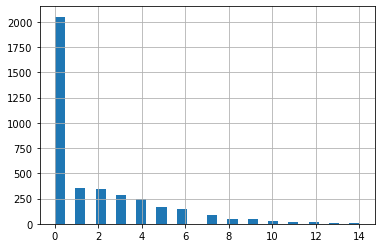

In [68]:
x = np.absolute(farm.num_young_children + farm.num_older_children - farm.num_children)
x[x < 15].hist(bins=30)

CGAP data has one derived variable for the number of children, `NUM_KIDS`, where child is defined as age ≤ 15 (see [`CGAP_2 Building the household_attributes dataset.ipynb`)](https://pitt.app.box.com/folder/134211247531). The individual_attributes dataset has, for each individual, age and education level and whether the individual is attending school full time, part-time or not at all, so it's possible to derive variables like those in Manobi data for the fraction of children in school.  

CGAP question D7 was recoded in [`CGAP_0 Basic Cleaning`](https://pitt.app.box.com/folder/134211247531) to have its values increase from "bad to good", so 1 means not attending school, 2 means attending part time and 3 means attending full time. We can use the individual attributes dataset to derive variables like those in Manobi data for the fraction of children in school:  



In [100]:
# group individuals in individual_attributes dataset into households
gb = C_IA.groupby(['HHID']) 

# here we define full-time to mean age <= 15 and attending school full time
FULL_TIME = gb.apply(lambda x: sum((x.D5 <= 15) & (x.D7 == 3)))



<AxesSubplot:>

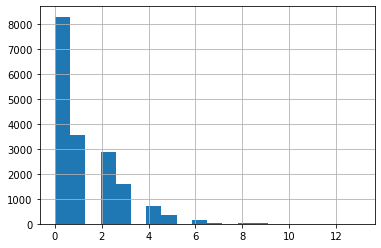

In [102]:
# the number of children attending school full time, by household
# i.e., approx. 3500 households have one child attending full time
# and approx 17636 - 8200 have at least one child attending full time
FULL_TIME.hist(bins=20)

#### Mean and Maximum education level in the household ####

Because Manobi does not individuate the members of households, we cannot tell the average or maximum level of education in the household.  We can do this for CGAP:

In [66]:
Data.cols_from_countries('D8_MAX','D8_MEAN','NUM_KIDS', 'NUM_ADULTS',countries = ['bgd'])

,D8_MAX,D8_MEAN,NUM_KIDS,NUM_ADULTS
1,5.0,2.750000,0,4
2,7.0,6.125000,2,7
3,9.0,6.000000,0,3
4,5.0,4.000000,0,3
5,7.0,4.857143,3,4
...,...,...,...,...
800129,3.0,3.000000,0,2
800130,5.0,3.000000,1,3
800131,5.0,4.000000,2,2
800132,7.0,4.200000,3,3


#### Household Attributes: Construction quality ####

Both Manobi and CGAP ask about the building materials of the home.  Manobi asks:

- housing_material: 0,1 or 2, worst to best  
- access_electricity: 0,1 or 2, worst to best  
- access_drinking_water: 0,1 or 2, worst to best  

CGAP asks a variety of questions that differ by country, so I have derived two variables that map these questions to a common, zero-to-one scale:

- HOUSING0 : A derived, min-max scaled variable that represents the quality of house construction materials
- HOUSING1 : A derived, min-max scaled variable that includes water, toilet and energy along with construction materials
- HOUSING1_B : A binned version of HOUSING1


#### Household Attributes: Transportation ####

Transportation is very important for farmers but neither CGAP nor Manobi ask much about it.  

In [110]:

# Manobi has one variable, `transportation`:
print(farm.transportation.value_counts())
print("__________________________")

# Manobi season data asks about 'tractor_season1','van_season1','cart_season1'

print(season.van_season1.value_counts())
print("__________________________")


# CGAP asks questions `A29`, `A35` and `H14`: 

Data.describe('A29')
Data.describe('A35')
Data.describe('H14')



A pied            3085
Moto/Mobylette     367
VElo               294
Voiture             43
Name: transportation, dtype: int64
__________________________
no     2886
yes     221
Name: van_season1, dtype: int64
__________________________
label : A29
 text : Why do you sell your crops and livestock at this location?
 qtype : multi
 survey : rr
 answers : {'yes': 1, 'no': 2}
 column names : ['best_price', 'no_transport', 'poor_roads', 'unaware_of_prices', 'small_production', 'other', 'DK']

label : A35
 text : What challenges do you face in terms of getting your crops and livestock to your customers?
 qtype : multi
 survey : rr
 answers : {'yes': 1, 'no': 2}
 column names : ['distance', 'transport', 'damage', 'lack_storage', 'lack_refrigeration', 'unreliable_middlemen', 'no_challenges', 'other']

label : H14
 text : How often do you make each of the following expenses?
 qtype : multi
 survey : rr
 answers : {'weekly': 1, 'monthly': 2, 'few_times_a_year': 3, 'annually': 4, 'according_to_ha

## Economics ##

CGAP ask a great many questions about economic activities, not all of which have been turned into data objects (see the [individual country User Guides](https://pitt.app.box.com/folder/134211910534) and the [level0, level1](https://pitt.app.box.com/folder/136679236153) and [single- and multiple-respondent surveys](https://pitt.app.box.com/folder/136316702885) for data that haven't yet been turned into data objects). 

Manobi asks very few questions about economic activities, though I believe it asks more than we have access to or have been cleaned; for example, I think it asks whether insurers paid out. 

### Economic health at the time of the survey ###

The following CGAP questions assess the level of economic security in households. Manobi has no comparable questions:

In [121]:
for question in ['D20','H25','H27','H28','H35','PPI_CUTOFF']:
    Data.describe(question)

label : D20
 text : Which answer best reflects your family's current financial situation?
 qtype : single
 survey : hh
 answers : {'not_enough_for_food': 1, 'food_and_clothes_only': 2, 'can_save_a_bit': 3, 'can_buy_some_expensive_goods': 4}

label : H25
 text : Now I would like to ask you a few questions about how you manage your money.
 qtype : multi
 survey : sr
 answers : {'yes': 1, 'no': 2}
 column names : ['could_relatives_help', 'household_skip_meal', 'house_unlit', 'too_sick_to_work', 'receive_support']

label : H27
 text :  Imagine that you have an emergency and you need to pay <<a lot>>. How possible is it that you could come up with <<a  lot>> within the next month—very possible, somewhat possible, or not possible?
 qtype : single
 survey : sr
 answers : {'very_possible': 1, 'somewhat_possible': 2, 'not_possible': 3}

label : H28
 text : What would be the main source of money that you would use to come up with <<a lot>> within the next month?
 qtype : single
 survey : sr
 ans

Note that CGAP countries report on the Progress-Out-of-Poverty index.  All countries report on `PPI_CUTOFF`, which is a $2.50/day cutoff, but some countries report other PPI data.  See the individual countries' `level0.csv` files [here](https://pitt.app.box.com/folder/136679236153). 

Some derived CGAP variables reflect modest degrees of affluence.  These are all min-max scaled questions (on a zero-to-one scale) to ensure that they are comparable across countries.  See [`CGAP_2 Building the household_attributes dataset.ipynb`)](https://pitt.app.box.com/folder/134211247531). 

- MOBILES: a scaled variable that represents the number of mobile phones in the household
- MOBILES_B: a binned version of MOBILES
- HOUSING0, HOUSING1, HOUSING1_B, mentioned earlier, are derived variables that scale combined information about construction material, water, toilet facilities and energy.  HOUSING0 is an index of the quality of the house based only on construction materials.  HOUSING1 adds water, toilet and energy information. 
- POSSESS0, POSSESS1, POSSESS1_B represent the possessions of a household.  POSSESS0 combines several questions in each survey but leaves out a question about modes of transportation.  POSSESS1 includes this question, which asks whether the household owns bicycles, motor scooters or a car.  POSSESS1_B is a binned version of POSSESS1.

### Income ###

Manobi has a single variable, `income`, that records income, but I don't know the units of income, or whether it is monthly, seasonal or annual, whether it is income for the household or just the respondent, etc. Moreover, Manobi's `income` variable is zero for roughly 20% of the respondents. 

<AxesSubplot:>

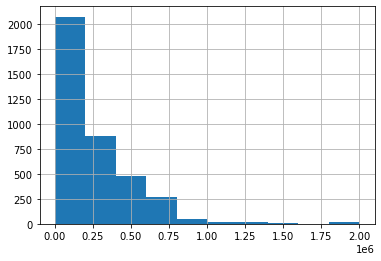

In [115]:
np.sum(farm.income == 0)
farm.income.hist()

CGAP reports monthly income and outgoings in country-specific units.  As with the Manobi distribution, above, income is skewed in the CGAP countries.  I took the log of income (and outgoing) and converted it to Z scores so that income could be compared across the CGAP countries:

In [120]:
for question in ['D19','D21','D19_LZ','D21_LZ']:
    Data.describe(question)

label : D19
 text : What is the minimum amount your household needs to survive per month (for personal expenses)?
 qtype : single
 survey : hh
 answers : None

label : D21
 text : What is your household’s average monthly income across all sources of money that your household receives?
 qtype : single
 survey : hh
 answers : None

label : D19_LZ
 text : D19_L is standardized (Z scores) within country Z scores can be compared across countries 
 qtype : single
 survey : hh
 answers : None

label : D21_LZ
 text : D21_L is standardized (Z scores) within country Z scores can be compared across countries 
 qtype : single
 survey : hh
 answers : None



### Sources of Income ###

Manobi asks nothing about sources of income, but, curiously, it does ask whether the wife trades, or food-crops or crafts.  Unfortunately, it doesn't ask anything further about the wife's activities, nor does it differentiate the activities of wives in polygamous households. 

CGAP asks many questions about sources of income.  Some are questions about the respondents' profession:

In [140]:
for question in ['A4','A10','H6','H7',]:
    Data.describe(question)


label : A4
 text : Do you consider your farm to be a business?
 qtype : single
 survey : rr
 answers : {'yes': 1, 'no': 2}

label : A10
 text : Do you have any livestock herds, other farm animals, or poultry?
 qtype : single
 survey : rr
 answers : {'yes': 1, 'no': 2}

label : H6
 text : What is your primary job (i.e., the job where you spend most of your time)?
 qtype : single
 survey : rr
 answers : {'farmer': 1, 'professional': 2, 'shop_owner': 3, 'business_owner': 4, 'laborer': 5, 'other': 6}

label : H7
 text : What are your secondary or side jobs?
 qtype : multi
 survey : rr
 answers : {'yes': 1, 'no': 2}
 column names : ['farmer', 'professional', 'shop_owner', 'business_owner', 'laborer', 'other', 'no_secondary_job']



Because farmers often have trouble making ends meet, they may have other sources of income:

In [130]:
for question in ['D15','D17','H1','H2A','H2B','H3','H4','H5','H9','H10','H11']:
    Data.describe(question)


label : D15
 text : What is your household’s smallest source of income?
 qtype : single
 survey : hh
 answers : {'regular_job': 1, 'occasional_job': 2, 'retail_business': 3, 'services_business': 4, 'grant_pension': 5, 'family_friends': 6, 'growing_crops': 7, 'rearing_livestock': 8, 'other': 9}

label : D17
 text : What is your household’s largest source of income?
 qtype : single
 survey : hh
 answers : {'regular_job': 1, 'occasional_job': 2, 'retail_business': 3, 'services_business': 4, 'grant_pension': 5, 'family_friends': 6, 'growing_crops': 7, 'rearing_livestock': 8, 'other': 9}

label : H1
 text : Do you generate income from the following sources?
 qtype : multi
 survey : rr
 answers : {'yes': 1, 'no': 2}
 column names : ['regular_job', 'occasional_job', 'retail_business', 'services_business', 'grant_pension', 'family_friends', 'growing_crops', 'rearing_livestock', 'other']

label : H2A
 text : Which of these has been your main source of income in the last month?
 qtype : single
 

In [177]:
x = Data.cols_from_countries (('H10','govt_benefits'), ('H10','remittances'), ('H10','other_benefits'), ('H10','labor_for_hire'), ('H10','sell_belongings'),countries=countries)
for c in x.columns: print(x[c].value_counts())

2    16796
1      333
Name: govt_benefits, dtype: int64
2    14440
1     2689
Name: remittances, dtype: int64
2    16949
1      180
Name: other_benefits, dtype: int64
2    14522
1     2607
Name: labor_for_hire, dtype: int64
2    11775
1     5354
Name: sell_belongings, dtype: int64


### Loans ###

Manobi has several questions in their farm dataset about loans:

- 'wants_credit': 'not interested' : 0, 'a little interested' : 1,'moderately interested' : 2, 'interested' : 3, 'very interested' : 4
- 'credit_from_coop': 'never' : 0, 'sometimes' : 1, 'always': 2 
- 'credit_from_third_party': 'never' : 0, 'sometimes' : 1, 'always': 2 
- 'credit_from_bank': 'never' : 0, 'sometimes' : 1, 'always': 2
- 'loan_amount', 
- 'loan_rate', 
- 'has_bridge_loan' : no explanation from Manobi, but it is a distribution of numbers, most of which are zero
- 'bridge_loan_amount' : no explanation from Manobi, but it is a distribution of numbers different from 'has_bridge_loan'
- 'wants_bridge_loan', 0: no, 1: yes
- 'wants_bridge_loan_amount':  another distribution of numbers


I derived two variables:   


`has_loan:` 

`if row.loan_amount == 0 and row.loan_rate == 0:
        return 0
    elif row.loan_amount > 0 and row.loan_rate > 0:
        return 1
    else:
        return np.nan`
        
        
`creditworthy:`  

`if row.has_loan == 0 and row.credit_from_bank == 0:
        return 0
    elif row.has_loan == 1:
        return 1
    else:
        return np.nan `
        
        

Manobi also asked questions about credit in their season dataset, but only about season 2! Moreover, most of the data in these columns are NaN or 'no' or zero. 

- 'received_credit_season2',
- 'credit_amount_demanded_season2',
- 'credit_amount_received_season2',
- 'credit_source_season2',
- 'interest_rate_season2'

CGAP has several questions pertaining to loans.  The Module on Financial Services contains many questions about loans, savings plans, bank services, etc. (see the [individual country User Guides](https://pitt.app.box.com/folder/134211910534) and the [single-respondent surveys](https://pitt.app.box.com/folder/136316702885) for all the details). 

In [184]:
for question in ['F58','F53','F54','F55','F56']: Data.describe(question)


label : F58
 text : Do you currently have any loans?
 qtype : single
 survey : sr
 answers : {'yes': 1, 'no': 2}

label : F53
 text : What would be the main reasons for borrowing money?
 qtype : multiple
 survey : sr
 answers : None
 column names : ['start_business', 'cash_flow', 'buy_inputs', 'big_purchases', 'other_agriculture', 'emergency', 'school_fees', 'daily_expenses']

label : F54
 text : For your agricultural activities, how important to you is it to borrow from the following?
 qtype : multiple
 survey : sr
 answers : None
 column names : ['bank', 'microfinance', 'cooperative', 'savings_collector', 'VLSA', 'friends_family']

label : F55
 text : In the past 12 months have you attempted to borrow from the following?
 qtype : multiple
 survey : sr
 answers : None
 column names : ['bank', 'microfinance', 'cooperative', 'savings_collector', 'VLSA', 'friends_family']

label : F56
 text : If the need arose, would you attempt to borrow from the following?
 qtype : multiple
 survey : s

CGAP also has three questions, F59, F60 and F61, for which I have not yet made data objects. These questions ask whether people think various financial products are important, whether they have them, and whether they want them.  However, very few people have any of them, and there is a bewildering number to choose from.  The main thing we want to know is whether people have loans and savings plans etc.  So question F60 is the one to focus on.  I derived a new column for each country and each of three kinds of financial instrument  that encodes the number of that type of instrument that each person has:


In [185]:
for question in ['FORMAL_LOANS','SCHOOL_FEE_PLANS','AG_INPUTS_PLANS']: Data.describe(question)

label : FORMAL_LOANS
 text : How many loans do you currently have?
 qtype : single
 survey : sr
 answers : None

label : SCHOOL_FEE_PLANS
 text : How many credit/savings plans for school fees do you currently have?
 qtype : single
 survey : sr
 answers : None

label : AG_INPUTS_PLANS
 text : How many savings/payment plans for agricultural inputs do you currently have?
 qtype : single
 survey : sr
 answers : None



### Expenses ###

Most questions were about agricultural expenses.  CGAP asked one question, H14, about other kinds of expenses, and no questions about agricultural expenses.  It does ask question `A22` about the availability of water and irrigation. 

Manobi asked many questions about agricultural expenses, including the purchase of seed, fertilizer, livestock, equipment, etc.  (Labor, another expense, is documented below.) 

Manobi's farmer dataset includes four variables about agricultural inputs:

- 'input_use' : 
- 'input_cost'
- 'inputs_useful'
- 'interest_use_inputs'

Manobi's season dataset includes much more detailed information about inputs for specific plots and seasons:

- 'seed_variety_season1',
- 'seed_amount_season1',
- 'seed_cost_season1',


- 'used_fertilizer_season1',
- 'fertilizer_num_sacks_season1',
- 'fertilizer_type_season1',
- 'fertilizer_formula_season1',
- 'fertilizer_amount_season1',


- 'insecticide_season1',
- 'insecticide_brand_season1',
- 'fungicide_season1',
- 'fungicide_brand_season1',
- 'herbicide_season1',
- 'herbicide_brand_season1',
 
 
Season 2 data is organized differently: It assumes two fertilizer applications and says nothing about insecticide, fungicide or herbicide.  It does, however, ask about irrigation expenses.

- 'seed_amount_demanded_season2',
- 'seed_amount_received_season2',
- 'seed_value_season2',
- 'seed_variety_season2',
 
 
- 'fertilizer1_application_season2',
- 'fertilizer1_type_season2',
- 'fertilizer1_why_not_applied_season2',

- 'fertilizer1_type_season2.1',
- 'fertilizer1_amount_season2',
- 'fertilizer1_cost_season2',


- 'fertilizer2_application_season2',
- 'fertilizer2_date_season2',
- 'fertilizer2_type_season2',
- 'fertilizer2_amount_season2',
- 'fertilize2_cost_season2',


- 'irrigation_method_dry_season',
- 'irrigation_cost_dry_season',
- 'irrigation_source_dry_season'




### Labor ###

Manobi asked four questions about labor for season 1, but not about season 2: 

- 'labor_type_season1',
- 'hired_labor_days_season1',
- 'hired_labor_cost_season1',
- 'labor_soil_preparation_season1',

CGAP asked who is hired as labor and for which purposes, but, unlike Manobi, not the actual costs of labor

In [186]:
for question in ['A23','A24']: Data.describe(question)

label : A23
 text : For managing the land and livestock, what types of labor do you use?
 qtype : multi
 survey : rr
 answers : {'yes': 1, 'no': 2}
 column names : ['friends_neighbors', 'hired_extended_period', 'family', 'day_labor', 'other', 'no_labor']

label : A24
 text : What do you use the labor for?
 qtype : multi
 survey : rr
 answers : {'yes': 1, 'no': 2}
 column names : ['ploughing', 'planting', 'weeding', 'harvesting', 'selling_crops', 'livestock_care', 'livestock_sale', 'other']



### Suppliers ###

Manobi asked two questions about suppliers, 'seed_provider_season2' and 'seed_payment_method_season2'.  We have no information about suppliers for season 1. 

CGAP asked about types of suppliers (e.g., cooperatives, wholesalers, etc.) and about how they are paid. 

In [187]:
for question in ['A15','A17','A18']: Data.describe(question)

label : A15
 text : Who do you normally purchase your main agricultural and livestock inputs (such as seeds, fertilizer, or pesticide) from?
 qtype : multi
 survey : rr
 answers : {'yes': 1, 'no': 2}
 column names : ['cooperative', 'wholesaler', ' processor', 'retailer', 'government', 'middleman', 'other', 'no_purchase', 'DK']

label : A17
 text : How do you usually pay your suppliers?
 qtype : multi
 survey : rr
 answers : {'yes': 1, 'no': 2}
 column names : ['cash', 'cheque', 'pay_cash_bank', 'electronic', 'mobile_banking', 'in_kind', 'prepaid_card', 'other', 'do_not_buy', 'DK']

label : A18
 text : Do your suppliers give you the option to pay them later (with credit) or do you have to pay them immediately?
 qtype : single
 survey : rr
 answers : {'pay_later': 1, 'pay_immediately': 2}



### Post-harvest: Production, Storage, Contracts and Selling ###

#### Production #### 
Manobi's season dataset includes several questions about the season's production. 

- 'production_season1' 
- 'harvest_num_sacks_season1' 
- 'kg_per_sack_season1'

Unfortunately, it asks no questions about production in season 2.

CGAP asks no questions about the tonnage or yields etc. 

#### Storage ####
Manobi's season dataset includes two questions about storage in season 1, 'storage_place_season1' and 'secondary_storage_place_season1', none about season 2. 

CGAP asks several questions about storage:

In [158]:
for question in ['A52','A53','A56','A57']: Data.describe(question)

label : A52
 text : Do you currently store any of your crops after the harvest?
 qtype : single
 survey : sr
 answers : {'yes': 1, 'no': 2}

label : A53
 text : Which crops do you normally store?
 qtype : multi
 survey : sr
 answers : {'1': 'yes', '2': 'no'}
 column names : ['Rice', 'Wheat', 'Mango', 'Jute', 'Maize', 'Tea', 'Pulses', 'Sugarcane', 'Tobacco', 'Chilies', 'Onions', 'Garlic', 'Potato', 'Rapeseed', 'Mustard_seed', 'Coconut', 'Eggplant', 'Radish', 'Tomatoes', 'Cauliflower', 'Cabbage', 'Pumpkin', 'Banana', 'Jackfruit', 'Pineapple', 'Guava', 'Sesame', 'Other_1', 'Other_2', 'Other_3', 'No_crop']

label : A56
 text : Why do you store your crops?
 qtype : multi
 survey : sr
 answers : {'yes': 1, 'no': 2}
 column names : ['better_price', 'minimize_risk', 'sell_after_season', 'school_fees', 'major_expense', 'consume_later', 'other']

label : A57
 text : Why do you not currently store your crops?
 qtype : multi
 survey : sr
 answers : {'yes': 1, 'no': 2}
 column names : ['no_storage'

#### Contracts to buy product and attributes of the buyer ####

Manobi has one question, 'pledged_output', which is probably about whether the production for a season is committed to a buyer, and one question about the type of buyer.  For the former, 0 means the output isn't pledged, 1 means partly pledged, 2 means completely pledged. 

In [147]:
print(farm.pledged_output.value_counts())
print()
print(farm.buyer_type.value_counts())

0.0    2314
1.0     445
2.0     308
Name: pledged_output, dtype: int64

market      1994
merchant    1211
lender       293
coop         253
Name: buyer_type, dtype: int64


CGAP asks several questions about to whom is the crop sold, where is it sold, and market prices:

In [162]:
for question in ['A32','A27','A28','A29','A30','A31','A33','A35']: Data.describe(question)

label : A32
 text :  Do you have a contract to sell any of your crops or livestock?
 qtype : single
 survey : rr
 answers : {'yes': 1, 'no': 2}

label : A27
 text : Who do you sell your crops and livestock to?
 qtype : multi
 survey : rr
 answers : {'yes': 1, 'no': 2}
 column names : ['cooperative', 'wholesaler', 'processor', 'retailer', 'public', 'government', 'middleman', 'other', 'DK']

label : A28
 text : Where do you normally sell your crops and livestock?
 qtype : multi
 survey : rr
 answers : {'yes': 1, 'no': 2}
 column names : ['at_farm', 'in_village', 'local_market', 'regional_market', 'other']

label : A29
 text : Why do you sell your crops and livestock at this location?
 qtype : multi
 survey : rr
 answers : {'yes': 1, 'no': 2}
 column names : ['best_price', 'no_transport', 'poor_roads', 'unaware_of_prices', 'small_production', 'other', 'DK']

label : A30
 text : When you sell your crops and livestock, do you get the current market price?
 qtype : single
 survey : rr
 answe

## Risks and Insurance ##

Smallhold agriculture is a risky business.  Manobi's farm dataset has one question and its season dataset has four about insurance:

- 'interest_insurance' : 'no' : 0, 'maybe' : 1, 'yes' : 2


- 'insurance_premium_season1' : number representing insurance premium
- 'insurance_compensation_season1' : whether insurance paid out (only 24 yes, 3083 no)
- 'insurance_compensation_amount_season1' : only ten data points
- 'insurance_satisfaction_season1' : answers are not_at_all, moderate and entirely

CGAP has several questions that characterize risks:


In [197]:
for q in ['A60','A61','A62','H34','H35']: Data.describe(q)

label : A60
 text : Which of the following factors pose the most significant risk to your agricultural activities?
 qtype : single
 survey : sr
 answers : {'weather': 1, 'power': 2, 'prices': 3, 'inputs': 4, 'pests_disease': 5, 'contract_broken': 6, 'no_sale': 7, 'perils_accidents': 8, 'health': 9, 'loss_of_land': 10, 'equipment_breakdown': 11, 'input_quality': 12, 'fuel_prices': 13, 'other': 14}

label : A61
 text : Have your agricultural activities been seriously affected by any of the following events in the past three years?
 qtype : multi
 survey : sr
 answers : {'yes': 1, 'no': 2}
 column names : ['weather', 'pests_disease', 'accident', 'market_prices', 'input_prices', 'contract_broken', 'downturn_no_sale', 'equipment_breakdown', 'health', 'death', 'unrest_or_war', 'DK']

label : A62
 text : How did you mainly cope when this happened?
 qtype : multi
 survey : sr
 answers : {'temp_job': 1, 'took_loan': 2, 'borrowed': 3, 'sold_livestock': 4, 'sold_asset': 5, 'used_savings': 6, 'ins

CGAP also has questions that address how respondents would cope with a financial shock.  Some of these are informal mechanisms, such as getting help from family, others are about formal insurance:

In [201]:
for q in ['H27','H28','H31','H32']: Data.describe(q)

label : H27
 text :  Imagine that you have an emergency and you need to pay <<a lot>>. How possible is it that you could come up with <<a  lot>> within the next month—very possible, somewhat possible, or not possible?
 qtype : single
 survey : sr
 answers : {'very_possible': 1, 'somewhat_possible': 2, 'not_possible': 3}

label : H28
 text : What would be the main source of money that you would use to come up with <<a lot>> within the next month?
 qtype : single
 survey : sr
 answers : {'savings': 1, 'friends_family': 2, 'working': 3, 'employer_loan': 4, 'credit_card': 5, 'financial_inst': 6, 'savings_credit_group': 7, 'money_lender': 8, 'other': 9}

label : H31
 text :  Do you have any of the following?
 qtype : multi
 survey : sr
 answers : {'yes': 1, 'no': 2}
 column names : ['insurance', 'living_will', 'retirement', 'savings', 'investment']

label : H32
 text : Which of the following types of insurance do you have?
 qtype : multi
 survey : sr
 answers : {'yes': 1, 'no': 2}
 column n

## Savings ##

Manobi asks no questions about savings.  CGAP, which was sponsored in part by the banking industry, asks many. Some assess the perceived need for savings and the specific reasons for saving:

In [207]:
for q in ['H17','H18','H21','A47','A48','A49','F54','F55','F56','SCHOOL_FEE_PLANS','AG_INPUTS_PLANS']: Data.describe(q)

bgd_H23 does not exist
label : H17
 text :  In your opinion, how important is it for your household to save for each of the following?
 qtype : multi
 survey : sr
 answers : {'very_important': 1, 'somewhat_important': 2, 'not_important': 3}
 column names : ['future_purchases', 'unexpected_event', 'regular_purchases', 'school_fees']

label : H18
 text :  Which of the following do you feel your household needs to save for the most?
 qtype : single
 survey : sr
 answers : {'future_purchases': 1, 'unexpected_event': 2, 'regular_purchases': 3, 'school_fees': 4, 'other': 5}

label : H21
 text : In your opinion, how important is it for your household to invest in each of the following?
 qtype : multi
 survey : sr
 answers : {'very_important': 1, 'somewhat_important': 2, 'not_important': 3}
 column names : ['farm', 'home', 'education', 'business']

label : A47
 text : How important is it to keep money aside for the following agricultural needs—very, somewhat, or not important?
 qtype : multi
 

CGAP asked a bunch of questions about how and where respondents save their money.  See earlier section on "Loans" for questions pertaining to formal savings and loans.  Many people use informal methods such as "money guards" and "merry-go-rounds" as well as semi-formal village savings and loans.  

In [204]:
for q in ['F46','F47','F50','F49','F51']: Data.describe(q)

label : F46
 text : Have you ever used any of the following financial services?
 qtype : multi
 survey : sr
 answers : {'yes': 1, 'no': 2}
 column names : ['VLSA', 'other_informal', 'money_guard', 'savings_collector', 'hawla_hundi', 'digital_card']

label : F47
 text : When did you last use any of the following financial services?
 qtype : multi
 survey : sr
 answers : {'yesterday': 1, 'last_week': 2, 'last_month': 3, 'last_quarter': 4, 'before_last_quarter': 5, 'stopped_using': 6}
 column names : ['VLSA', 'other_informal', 'money_guard', 'savings_collector', 'hawla_hundi', 'digital_card']

label : F50
 text : Which of these service providers or services is the most important to you?
 qtype : single
 survey : sr
 answers : None

label : F49
 text : Which of the following services do these groups provide?
 qtype : multiple
 survey : sr
 answers : None
 column names : ['merry_go_round', 'lend_nonmembers', 'lend_members', 'buy_for_members', 'guarantor_security', 'invest', 'purchase_tools'

<!-- ### Economic Risk, Insurance, etc. ###

['A60','A61','A62', 'H31','H32','H33','H34','H35'] -->

## Timing of Credit, Income and Expenses ##

Timing can have big effects:  If credit becomes available too late to pay for inputs, then the crop won't do as well as it might.  If repayment of loans must happen immediately after harvest, and farmers don't have savings or cannot afford to store crops, then they will have to sell at low prices (when everyone else is selling).  

We have some information about timing in Manobi data, in that we have some dates for seasons:

- 'sowing_date_season1',
- 'harvest_date_season1',
- 'selling_date_season1',
- 'selling_duration_season1',
- 'first_rainfall_date_season2',
- 'sowing_date_season2',
- 'fertilizer1_date_season2',
- 'fertilizer2_date_season2',
 
It remains to be seen whether we can reconstruct the season from these dates and use the timeline to make inferences about, say, the timing of loans. 

CGAP data is much less specific.  It has several questions about the frequency of income and expenses, but nothing from which we could construct a timeline:

In [176]:
# note esp. A57: "need_money"
for question in ['H8','H14','A56','A57']: Data.describe(question)

label : H8
 text : How frequently do you receive your main source of income...?
 qtype : multi
 survey : rr
 answers : {'daily': 1, 'weekly': 2, 'monthly': 3, 'annually': 4, 'after_a_time': 5, 'according_to_harvest': 6, 'DK': 7}
 column names : ['regular_job', 'occasional_job', 'retail_business', 'services_business', 'grant_pension', 'family_friends', 'growing_crops', 'rearing_livestock', 'other']

label : H14
 text : How often do you make each of the following expenses?
 qtype : multi
 survey : rr
 answers : {'weekly': 1, 'monthly': 2, 'few_times_a_year': 3, 'annually': 4, 'according_to_harvest': 5, 'never': 6}
 column names : ['groceries', 'transportation', 'medical', 'education', 'bills', 'emergencies', 'investments', 'large_purchases', 'home_repairs', 'other']

label : A56
 text : Why do you store your crops?
 qtype : multi
 survey : sr
 answers : {'yes': 1, 'no': 2}
 column names : ['better_price', 'minimize_risk', 'sell_after_season', 'school_fees', 'major_expense', 'consume_late